In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper, ParityMapper
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.circuit.library import TwoLocal
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import numpy as np
from qiskit.circuit.library import EfficientSU2

In [4]:
distances = np.arange(0.1, 4.0, 0.1)
vqe_energy = []
for dist in distances:
    driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 "+str(dist),
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
    )
    
    es_problem = driver.run()
    #fc_transformer = FreezeCoreTransformer()

    #es_problem = fc_transformer.transform(es_problem)
    mapper = JordanWignerMapper()
    numpy_solver = NumPyMinimumEigensolver()
    ansatz = UCCSD(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
        ),
    )

    vqe_solver = VQE(Estimator(), ansatz, SLSQP())
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters
    calc = GroundStateEigensolver(mapper, vqe_solver)
    res = calc.solve(es_problem)
    
    print(res.total_energies[0])
    vqe_energy.append(res.total_energies[0])
print("all energies have been calculated")

/opt/conda/lib/python3.10/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


2.7099607708691025
0.15748213480154805
-0.6018037107598484
-0.9141497046153986
-1.055159794447696
-1.116286006830975
-1.1361894540106483
-1.1341476666211623
-1.120560129777234
-1.1011503188064728
-1.0791929449548678
-1.0567407449283106
-1.035186263792877
-1.0154682470678413
-0.9981493525217315
-0.9834727288667664
-0.9714266884527232
-0.9618166584988271
-0.95433885399721
-0.94864111204644
-0.9443746796794912
-0.9412240270609933
-0.9389223672242952
-0.9372549143274008
-0.9360548559296693
-0.9351959404847796
-0.9345843026031444
-0.9341509655121332
-0.9338456108512033
-0.9336317012601809
-0.9334827987143032
-0.9333798408065342
-0.9333091431186892
-0.9332609365188678
-0.9332282933004622
-0.9332063383851479
-0.9331916688627135
-0.9331819293403331
-0.9331755029785086
all energies have been calculated


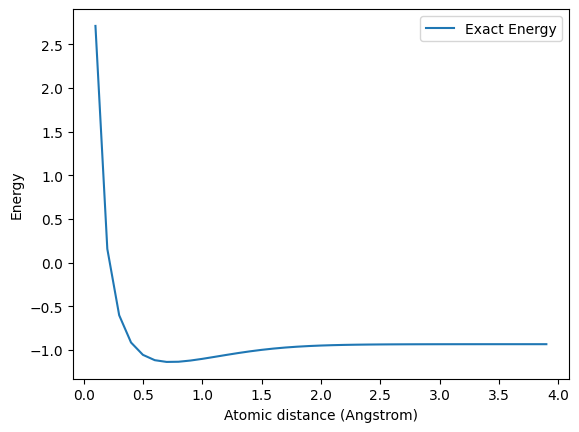

In [5]:
import matplotlib.pyplot as plt
plt.plot(distances, vqe_energy, label="Exact Energy")
#plt.plot(distances, exact_energies_n, label="Exact Electronic energies")
plt.xlabel("Atomic distance (Angstrom)")
plt.ylabel("Energy")
plt.legend()
plt.show()

In [25]:
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
driver = PySCFDriver(
    atom="Li 0 0 0; H 0 0 1.5",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
    )
es_problem = driver.run()
fc_transformer = FreezeCoreTransformer()
es_problem = fc_transformer.transform(es_problem)

mapper = JordanWignerMapper()
numpy_solver = NumPyMinimumEigensolver()
ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,mapper,),
    )

vqe_solver = VQE(Estimator(), ansatz, SLSQP())
vqe_solver.initial_point = [0.0] * ansatz.num_parameters
calc = GroundStateEigensolver(mapper, vqe_solver)
res = calc.solve(es_problem)
    
print(res.total_energies[0])
vqe_energy.append(res.total_energies[0])

-7.882139855619397


In [62]:
distances = np.arange(0.1, 4.0, 0.1)
vqe_energy1 = []
for dist in distances:
    driver = PySCFDriver(
    atom="Li 0 0 0; H 0 0 "+str(dist),
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
    )
    
    es_problem = driver.run()
    es_problem = driver.run()
    fc_transformer = FreezeCoreTransformer()

    es_problem = fc_transformer.transform(es_problem)
    mapper = JordanWignerMapper()
    #tapered_mapper = es_problem.get_tapered_mapper(mapper)
    qubit_op = mapper.map(es_problem.second_q_ops()[0])
    numpy_solver = NumPyMinimumEigensolver()

    ansatz = UCCSD(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
        ),
    )

    vqe = VQE(Estimator(), ansatz, SLSQP())
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = es_problem.interpret(vqe_calc).total_energies[0].real
    vqe_energy1.append(vqe_result)
    
    print(f"Interatomic Distance: {np.round(dist, 2)}",
          f"VQE Result: {vqe_energy1[-1]:.5f}")
    
print("all energies have been calculated")

KeyboardInterrupt: 

In [8]:
def vqe_solver(problem, converter, num_qubits):
    # Define the VQE solver
    solver = VQE(
        estimator = Estimator(), 
        ansatz = get_ansatz(num_qubits), 
        optimizer = SPSA(maxiter = 1500)
    )
    groundstate_solver = GroundStateEigensolver(converter, solver)
    result = groundstate_solver.solve(problem)
    return result

In [74]:
driver = PySCFDriver(
        atom="Si 0 0 0; Ge 0 0 2.44",
        basis="sto3g",
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )
    
es_problem = driver.run()
fc_transformer = FreezeCoreTransformer()

es_problem = fc_transformer.transform(es_problem)
mapper = JordanWignerMapper()
#tapered_mapper = es_problem.get_tapered_mapper(mapper)
    
qubit_op = mapper.map(es_problem.second_q_ops()[0])
print(qubit_op)
#tapered_mapper = es_problem.get_tapered_mapper(mapper)
#qubit_op1= tapered_mapper.map(qubit_op)
#print(qubit_op1)

-86.70672139786343 * IIIIIIIIIIIIIIIIIIIIIIIIII
+ 1.0722506050215888 * IIIIIIIIIIIIIIIIIIIIIIIIIZ
- 0.15601589250768408 * IIIIIIIIIIIIIIIIIIIIIIIIYY
- 0.15601589250768408 * IIIIIIIIIIIIIIIIIIIIIIIIXX
- 0.2933268835609515 * IIIIIIIIIIIIIIIIIIIIYZZZZY
- 0.2933268835609515 * IIIIIIIIIIIIIIIIIIIIXZZZZX
- 0.3426991408287514 * IIIIIIIIIIIIIIIIIIIYZZZZZY
- 0.3426991408287514 * IIIIIIIIIIIIIIIIIIIXZZZZZX
+ 0.06159948057474714 * IIIIIIIIIIIIIIIIIIYZZZZZZY
+ 0.06159948057474714 * IIIIIIIIIIIIIIIIIIXZZZZZZX
+ 0.16579545007303564 * IIIIIIIIIIIIIYZZZZZZZZZZZY
+ 0.16579545007303564 * IIIIIIIIIIIIIXZZZZZZZZZZZX
+ 3.3644285103734557 * IIIIIIIIIIIIIIIIIIIIIIIIZI
+ 0.030818430171113326 * IIIIIIIIIIIIIIIIIIIIYZZZYI
+ 0.030818430171113326 * IIIIIIIIIIIIIIIIIIIIXZZZXI
- 0.07334459734239943 * IIIIIIIIIIIIIIIIIIIYZZZZYI
- 0.07334459734239943 * IIIIIIIIIIIIIIIIIIIXZZZZXI
- 0.023861958834934926 * IIIIIIIIIIIIIIIIIIYZZZZZYI
- 0.023861958834934926 * IIIIIIIIIIIIIIIIIIXZZZZZXI
+ 0.056544166026709024 * IIIIIIIIIII